## Использование Silhouette score для выбора оптимального количества кластеров

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

Получим данные

In [2]:
mall = pd.read_csv("../../data/mall_customers.csv")

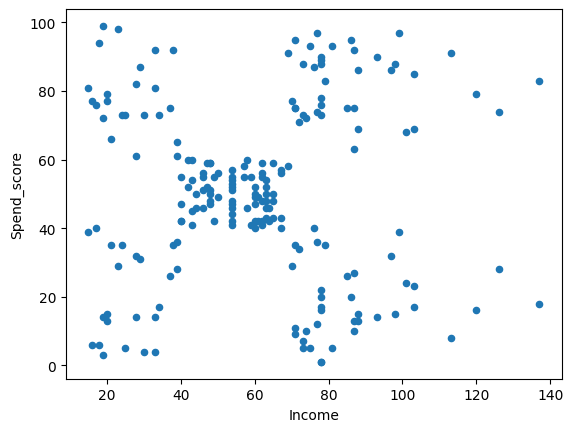

In [3]:
mall.rename({'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spend_score'}, axis=1, inplace=True)
mall.plot.scatter(x='Income', y='Spend_score')
plt.show()

Нормализуем данные

In [4]:
mall_scaled = mall.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

scaler = StandardScaler()
mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

Параметры кластеризации

In [5]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]

Модель KMeans для 3-х кластеров

In [11]:
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

Средняя оценка силуэта для 3-х кластеров

In [12]:
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


Список оценок для диапазона кластеров от 2 до 10

In [13]:
silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

Показатель k=5 имеет лучшую оценку, поэтому может быть оптимальным значением для кол-ва кластеров

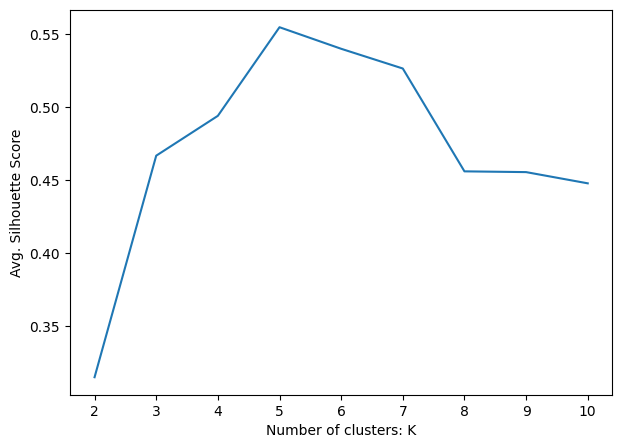

In [15]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores)
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()